### Parkinson's Drawings Wave

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
from fastai.vision import *
from fastai.metrics import accuracy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


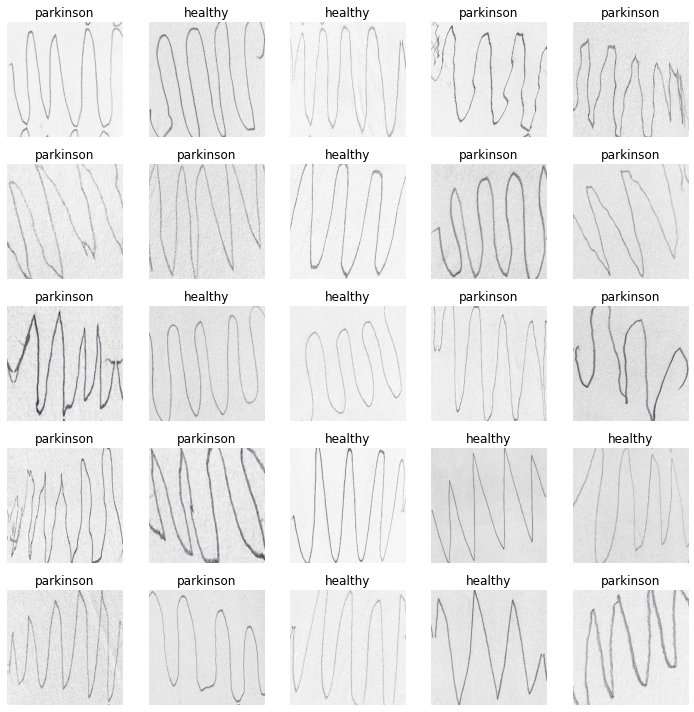

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(Path("/content/gdrive/My Drive/" + "Parkinson's Drawings/wave"), train='.', 
                                      ds_tfms= get_transforms(), valid_pct=0.2,size=(224,224), num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=5, figsize=(10, 10))

#### VGG16

In [6]:
learn = cnn_learner(data, models.vgg16_bn, metrics =accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.372677,0.695034,0.450000,00:20
1,1.421842,0.661404,0.550000,00:02
2,1.334221,0.576931,0.650000,00:02
3,1.233694,0.573184,0.700000,00:02


In [8]:
learn.save('vgg16_one')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


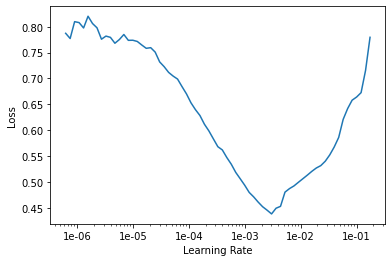

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.913443,0.588924,0.650000,00:02
1,0.951933,0.596809,0.700000,00:02


In [11]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.801182,0.596240,0.650000,00:02
1,0.644520,0.600603,0.700000,00:02


In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.533421,0.592954,0.600000,00:02
1,0.424063,0.598680,0.550000,00:02


In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.318213,0.557812,0.650000,00:02
1,0.301467,0.528115,0.700000,00:02


In [16]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.258546,0.497199,0.650000,00:02
1,0.256916,0.453150,0.800000,00:02


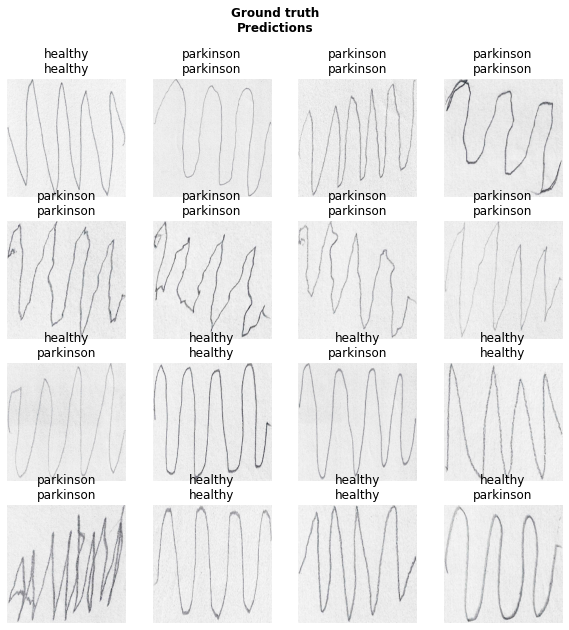

In [19]:
learn.save('vgg16_two')
learn.show_results(rows=4, figsize=(10,10))

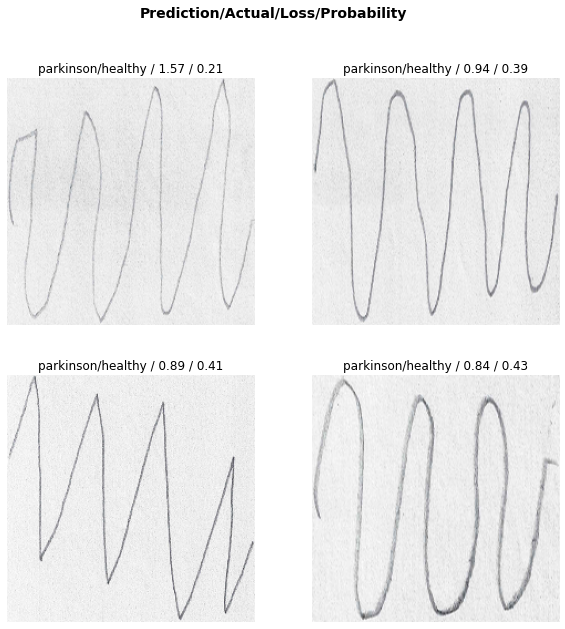

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))

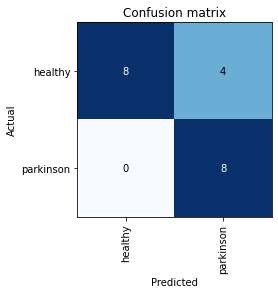

In [21]:
interp.plot_confusion_matrix()

#### VGG19

In [22]:
learn = cnn_learner(data, models.vgg19_bn, metrics =accuracy)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.934660,0.671572,0.600000,00:02
1,1.173350,0.603047,0.650000,00:02
2,1.094706,0.550186,0.750000,00:02
3,1.015415,0.498672,0.800000,00:02


In [24]:
learn.save('vgg19_one')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


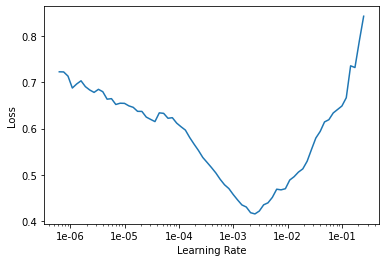

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.706667,0.484413,0.800000,00:03
1,0.648549,0.428799,0.850000,00:03


In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.576727,0.408279,0.850000,00:03
1,0.652422,0.375049,0.900000,00:03


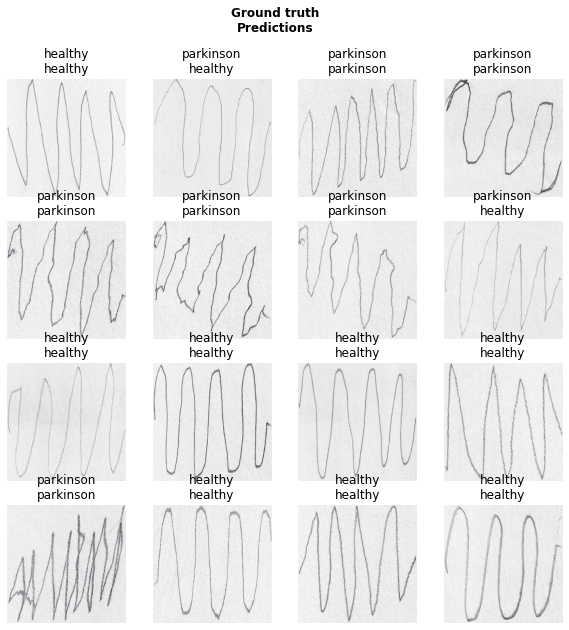

In [29]:
learn.save('vgg19_two')
learn.show_results(rows=4, figsize=(10,10))

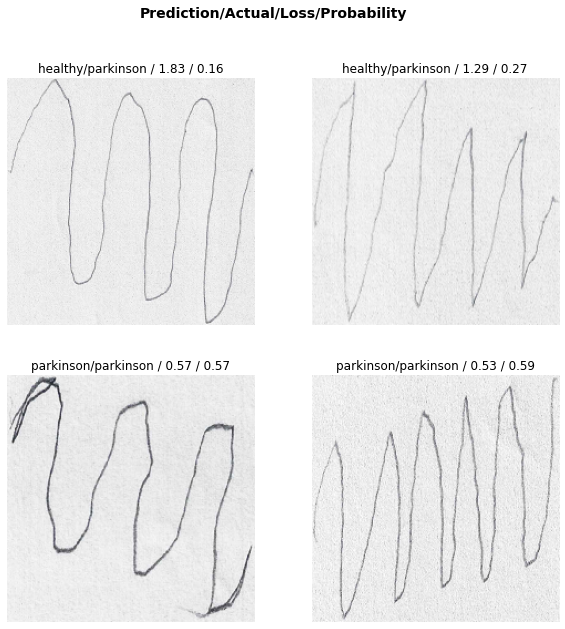

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))

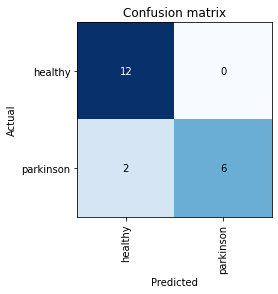

In [31]:
interp.plot_confusion_matrix()

#### RESNET50

In [32]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.602217,0.674617,0.600000,00:04
1,1.522622,5.330004,0.400000,00:02
2,1.369907,2.988351,0.400000,00:02
3,1.339944,0.776475,0.750000,00:02


In [34]:
learn.save('resnet50_one')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


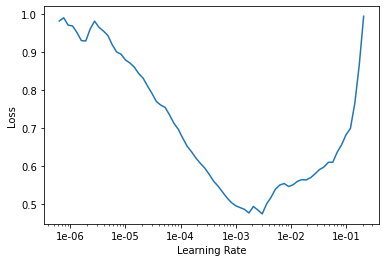

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.145400,0.449130,0.850000,00:02
1,0.886829,0.292577,0.800000,00:02


In [37]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.598062,0.226104,0.900000,00:02
1,0.687569,0.356341,0.900000,00:02


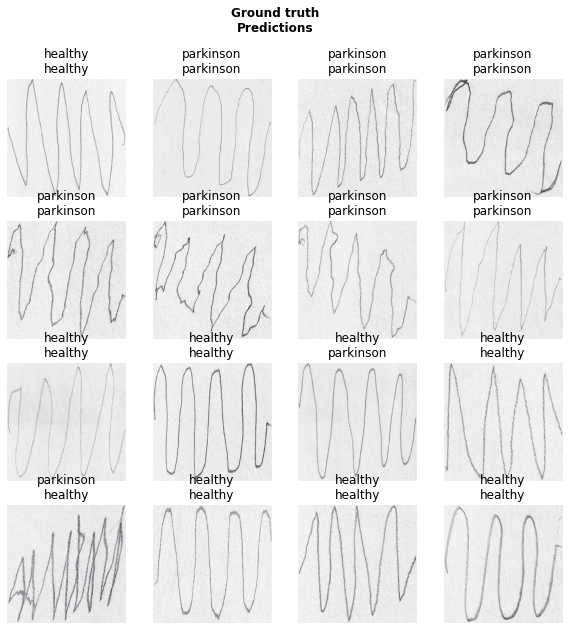

In [38]:
learn.save('resnet50_two')
learn.show_results(rows=4, figsize=(10,10))

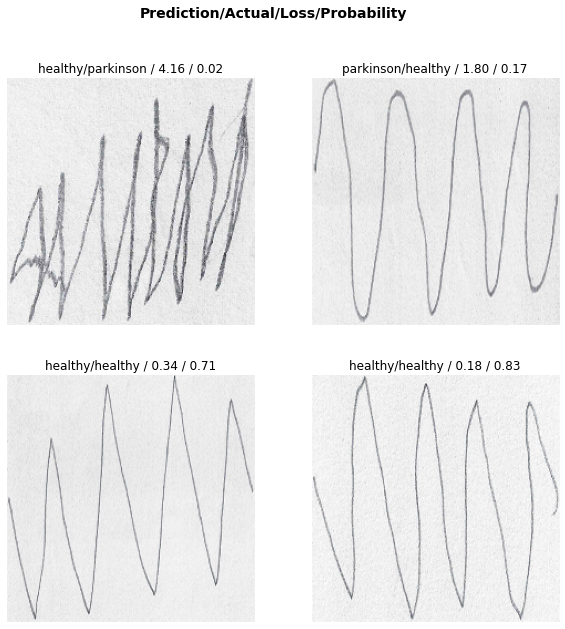

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))

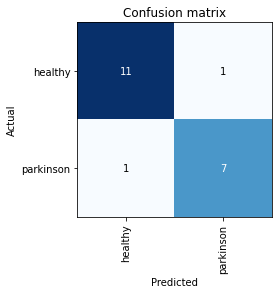

In [40]:
interp.plot_confusion_matrix()

#### RESNET101

In [41]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.889828,0.868647,0.450000,00:02
1,1.073173,0.420592,0.850000,00:02
2,1.273778,0.391777,0.750000,00:02
3,1.331915,0.435618,0.750000,00:02


In [43]:
learn.save('resnet101_one')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


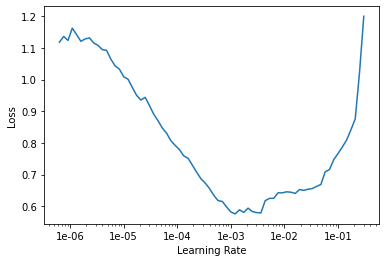

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.946830,0.320182,0.850000,00:02
1,0.994214,0.730301,0.800000,00:02


In [50]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.211608,0.381934,0.750000,00:02
1,0.238242,0.448498,0.850000,00:02


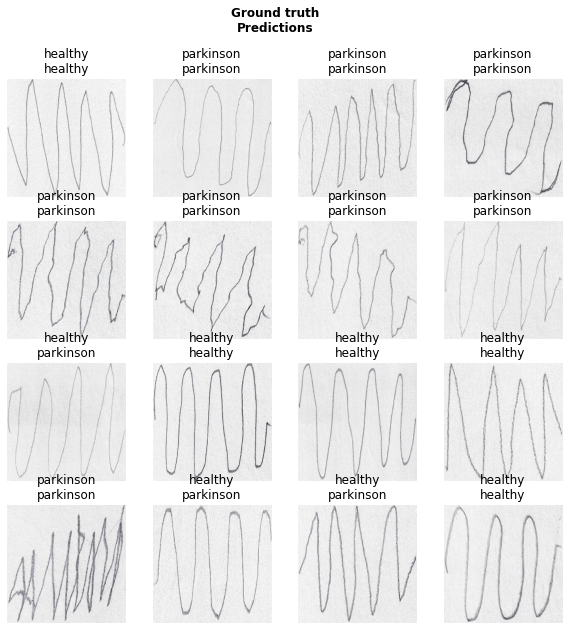

In [51]:
learn.save('resnet101_two')
learn.show_results(rows=4, figsize=(10,10))

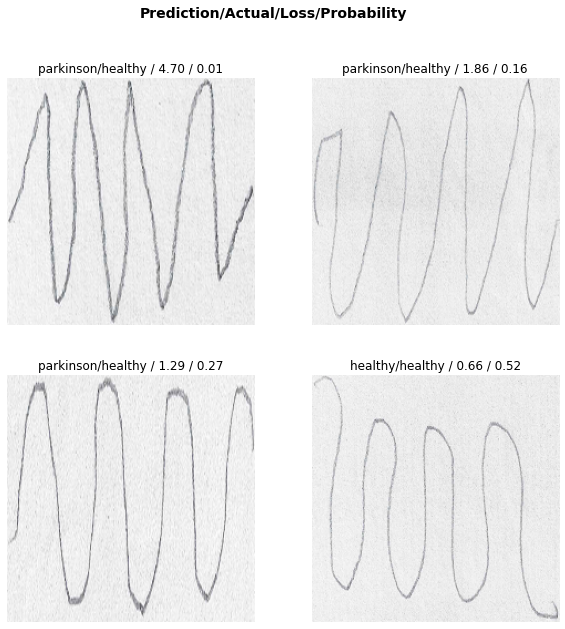

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))

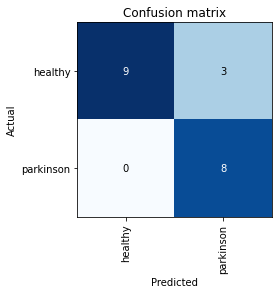

In [53]:
interp.plot_confusion_matrix()

#### Ансамбль

In [54]:
learn = cnn_learner(data, models.vgg16_bn, metrics =accuracy)
learn_vgg16 = learn.load('vgg16_two')

In [55]:
learn = cnn_learner(data, models.vgg19_bn, metrics =accuracy)
learn_vgg19 = learn.load('vgg19_two')

In [56]:
learn = cnn_learner(data, models.resnet50, metrics =accuracy)
learn_resnet50 = learn.load('resnet50_two')

In [57]:
learn = cnn_learner(data, models.resnet101, metrics =accuracy)
learn_resnet101 = learn.load('resnet101_two')

In [58]:
pred_vgg16,target_vgg16 = learn_vgg16.get_preds(data)
pred_vgg19, target_vgg19 = learn_vgg19.get_preds(data)
pred_resnet50, target_resnet50 = learn_resnet50.get_preds(data)
pred_resnet101, target_resnet101 = learn_resnet101.get_preds(data)

In [59]:
final_preds = 0.25 * pred_vgg16 + 0.25 * pred_vgg19 + 0.25 * pred_resnet50 + 0.25 * pred_resnet101

In [60]:
count = 0
tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(final_preds)):
  if final_preds.numpy()[i][0] > final_preds.numpy()[i][1]:
    if target_vgg16.numpy()[i] == 0:
      tn += 1
    else:
      fp +=1
  if final_preds.numpy()[i][0] < final_preds.numpy()[i][1]:
    if target_vgg16.numpy()[i] == 0:
      fn += 1
    else:
      tp +=1
print((tp+tn)/len(final_preds),"\n", tp/(tp+fn),"\n", tn/(tn+fp))
print(tp, fn, "\n", fp, tn)
#  if final_preds.numpy()[i][target_vgg16.numpy()[i]] > final_preds.numpy()[i][int(not(target_vgg16.numpy()[i]))]:
#    count = count + 1
#print(count/len(final_preds))

0.9146341463414634 
 0.9736842105263158 
 0.8636363636363636
37 1 
 6 38
